In [1]:
!pip install transformers
!pip install 'git+https://github.com/SKTBrain/KoBERT.git#egg=kobert_tokenizer&subdirectory=kobert_hf'
!pip install git+https://git@github.com/SKTBrain/KoBERT.git@master
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 20.7 MB/s 
     |████████████████████████████████| 596 kB 59.0 MB/s 
     |████████████████████████████████| 6.6 MB 59.4 MB/s 
     |████████████████████████████████| 101 kB 12.1 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/SKTBrain/KoBERT.git to /tmp/pip-install-1hpre8lz/kobert-tokenizer_9e9ec3f193c3466383173c083d5e706f
  Running command git clone -q https://github.com/SKTBrain/KoBERT.git /tmp/pip-install-1hpre8lz/kobert-tokenizer_9e9ec3f193c3466383173c083d5e706f
  Created wheel for kobert-tokenizer: filename=kobert_tokenizer-0.1-py3-none-any.whl size=4649 sha256=35a2be6c18c3be70efed17baf8cf490411fd3d779e9fd

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (3,978 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/MyDrive/AI_Project

/content/drive/MyDrive/AI_Project


In [3]:
# 분노와 혐오를 합쳐서 분노로 라벨링

import pandas as pd
import numpy as np

trainset = pd.read_csv('trainset.csv')
testset = pd.read_csv('testset.csv')
validset = pd.read_csv('validset.csv')
label = pd.read_csv('label.csv')

trainset.loc[trainset["encoded_label"] == 6, "encoded_label"] = 1
testset.loc[testset["encoded_label"] == 6, "encoded_label"] = 1
validset.loc[validset["encoded_label"] == 6, "encoded_label"] = 1

label = label.drop(6)

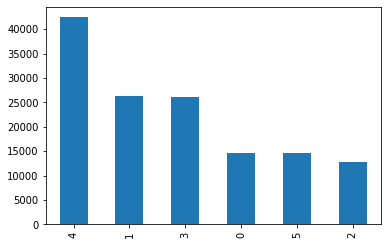

In [4]:
trainset["encoded_label"].value_counts().plot(kind="bar")

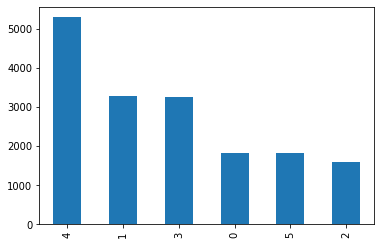

In [5]:
testset["encoded_label"].value_counts().plot(kind="bar")

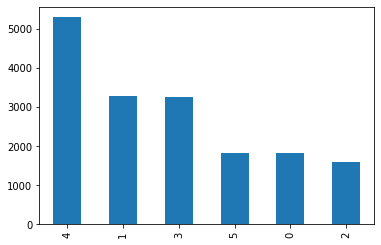

In [6]:
validset["encoded_label"].value_counts().plot(kind="bar")

In [7]:
from transformers import BertForSequenceClassification, BertConfig
from kobert_tokenizer import KoBERTTokenizer
import torch

tokenizer = KoBERTTokenizer.from_pretrained('skt/kobert-base-v1')
config = BertConfig.from_pretrained('skt/kobert-base-v1')
num_labels = 6
config.num_labels = num_labels
model = BertForSequenceClassification.from_pretrained('skt/kobert-base-v1', config=config)
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

model.to(device)
torch.cuda.is_available()

Downloading:   0%|          | 0.00/363k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/244 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/432 [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'XLNetTokenizer'. 
The class this function is called from is 'KoBERTTokenizer'.


Downloading:   0%|          | 0.00/535 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/352M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at skt/kobert-base-v1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


True

In [8]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(output_dir="test_trainer",
                                  num_train_epochs=5,
                                  evaluation_strategy="epoch",
                                  per_device_train_batch_size=64)

In [9]:
tokenizer("일기를 씁시다.", truncation=True, padding=True)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


{'input_ids': [2, 3803, 5573, 517, 6783, 6705, 5782, 54, 3], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [10]:
tokenizer.batch_encode_plus("<br>일기를 씁시다")

{'input_ids': [[2, 630, 3], [2, 517, 380, 3], [2, 517, 435, 3], [2, 632, 3], [2, 3803, 3], [2, 1258, 3], [2, 517, 6116, 3], [2, 3], [2, 517, 6783, 3], [2, 2959, 3], [2, 1562, 3]], 'token_type_ids': [[0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0, 0], [0, 0], [0, 0, 0, 0], [0, 0, 0], [0, 0, 0]], 'attention_mask': [[1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1, 1], [1, 1], [1, 1, 1, 1], [1, 1, 1], [1, 1, 1]]}

In [11]:
text = ["안녕하세요", "반갑습니다.", "일기 쓰는 것은 즐겁다. 그렇지만 조금 귀찮아."]

tokenizer(text)

{'input_ids': [[2, 3135, 5724, 7814, 3], [2, 2207, 5345, 6701, 54, 3], [2, 3803, 5561, 3084, 5760, 910, 517, 7313, 5397, 5782, 54, 1205, 6150, 4164, 1174, 7396, 6797, 54, 3]], 'token_type_ids': [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

In [12]:
tokenizer.batch_encode_plus(text)

{'input_ids': [[2, 3135, 5724, 7814, 3], [2, 2207, 5345, 6701, 54, 3], [2, 3803, 5561, 3084, 5760, 910, 517, 7313, 5397, 5782, 54, 1205, 6150, 4164, 1174, 7396, 6797, 54, 3]], 'token_type_ids': [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

In [13]:
# train_encodings = tokenizer.batch_encode_plus(trainset['Sentence'])
# val_encodings = tokenizer.batch_encode_plus(validset['Sentence'])
# test_encodings = tokenizer.batch_encode_plus(testset['Sentence'])

train_encodings = tokenizer(trainset['Sentence'].tolist(), truncation=True, padding=True, max_length=64, return_tensors="pt")
val_encodings = tokenizer(validset['Sentence'].tolist(), truncation=True, padding=True, max_length=64, return_tensors="pt")
test_encodings = tokenizer(testset['Sentence'].tolist(), truncation=True, padding=True, max_length=64, return_tensors="pt")

In [14]:
import torch

class Dataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)
    
train_dataset = Dataset(train_encodings, trainset['encoded_label'].tolist())
val_dataset = Dataset(val_encodings, validset['encoded_label'].tolist())
test_dataset = Dataset(test_encodings, testset['encoded_label'].tolist())

In [15]:
from datasets import load_metric

metric = load_metric("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [16]:
trainer = Trainer(model=model,
                  args=training_args,
                  train_dataset=train_dataset,
                  eval_dataset=val_dataset,
                  compute_metrics=compute_metrics)

trainer.train()

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 136842
  Num Epochs = 5
  Instantaneous batch size per device = 64
  Total train batch size (w. parallel, distributed & accumulation) = 64
  Gradient Accumulation steps = 1
  Total optimization steps = 10695


Epoch,Training Loss,Validation Loss,Accuracy
1,0.867200,0.834945,0.705016
2,0.728100,0.804840,0.714486
3,0.592200,0.833339,0.712615
4,0.448800,0.943758,0.709283
5,0.327700,1.048411,0.702736


Saving model checkpoint to test_trainer/checkpoint-500
Configuration saved in test_trainer/checkpoint-500/config.json
Model weights saved in test_trainer/checkpoint-500/pytorch_model.bin
Saving model checkpoint to test_trainer/checkpoint-1000
Configuration saved in test_trainer/checkpoint-1000/config.json
Model weights saved in test_trainer/checkpoint-1000/pytorch_model.bin
Saving model checkpoint to test_trainer/checkpoint-1500
Configuration saved in test_trainer/checkpoint-1500/config.json
Model weights saved in test_trainer/checkpoint-1500/pytorch_model.bin
Saving model checkpoint to test_trainer/checkpoint-2000
Configuration saved in test_trainer/checkpoint-2000/config.json
Model weights saved in test_trainer/checkpoint-2000/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 17106
  Batch size = 8
Saving model checkpoint to test_trainer/checkpoint-2500
Configuration saved in test_trainer/checkpoint-2500/config.json
Model weights saved in test_trainer/checkpoint-2500/

TrainOutput(global_step=10695, training_loss=0.6141191708144321, metrics={'train_runtime': 7068.6054, 'train_samples_per_second': 96.796, 'train_steps_per_second': 1.513, 'total_flos': 2.250371007638784e+16, 'train_loss': 0.6141191708144321, 'epoch': 5.0})

In [17]:
trainer.predict(test_dataset)

***** Running Prediction *****
  Num examples = 17105
  Batch size = 8


PredictionOutput(predictions=array([[-0.32987374,  0.55588144, -1.4930674 ,  5.3687587 , -3.1330788 ,
        -1.7621841 ],
       [-0.951523  ,  6.268474  , -0.5622449 , -1.4089197 , -1.2632217 ,
        -2.1918972 ],
       [-2.7991545 ,  2.3964498 , -2.6927097 ,  0.751802  ,  4.4033413 ,
        -2.2317958 ],
       ...,
       [-0.8144895 , -1.829703  , -2.6482766 ,  2.3154352 ,  4.140782  ,
        -2.2622478 ],
       [-1.5890267 ,  6.0268383 , -1.6095582 , -0.31068572,  0.05284383,
        -2.9309883 ],
       [ 0.97239006, -1.7938533 , -2.5538425 , -1.1652    ,  6.143769  ,
        -2.3835127 ]], dtype=float32), label_ids=array([3, 1, 4, ..., 4, 1, 4]), metrics={'test_loss': 1.0551679134368896, 'test_accuracy': 0.7002630809704765, 'test_runtime': 65.2033, 'test_samples_per_second': 262.333, 'test_steps_per_second': 32.805})

In [18]:
trainer.save_model('test_model')

Saving model checkpoint to test_model
Configuration saved in test_model/config.json
Model weights saved in test_model/pytorch_model.bin


In [20]:
test_model = BertForSequenceClassification.from_pretrained('./test_model', local_files_only=True)
test_model.to(device)

def prediction(predict_sentence):
  if type(predict_sentence) == str:
      data = [predict_sentence]
  else:
      data = predict_sentence

  inputs = tokenizer(data, return_tensors='pt')
  inputs.to(device)

  with torch.no_grad():
        logits = model(**inputs).logits

  predicted_class_id = logits.argmax().item()
  output = model.config.id2label[predicted_class_id]
    
  if output == "LABEL_0":
    return "놀람"
  elif output == "LABEL_1":
    return "분노"
  elif output == "LABEL_2":
    return "불안"
  elif output == "LABEL_3":
    return "슬픔"
  elif output == "LABEL_4":
    return "평범"
  elif output == "LABEL_5":
    return "행복"
  elif output == "LABEL_6":
    return "혐오"

loading configuration file ./test_model/config.json
Model config BertConfig {
  "_name_or_path": "skt/kobert-base-v1",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "author": "Heewon Jeon(madjakarta@gmail.com)",
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4",
    "5": "LABEL_5"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "kobert_version": 1.0,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3,
    "LABEL_4": 4,
    "LABEL_5": 5
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "problem_type": "single_label_clas

In [21]:
prediction("모의 코딩테스트도 치고 자소서도 써야 함")

'평범'

In [23]:
test_model = BertForSequenceClassification.from_pretrained('./test_model', local_files_only=True)
test_model.to(device)

trainer = Trainer(model=test_model,
                  args=training_args,
                  train_dataset=train_dataset,
                  eval_dataset=val_dataset,
                  compute_metrics=compute_metrics)

loading configuration file ./test_model/config.json
Model config BertConfig {
  "_name_or_path": "skt/kobert-base-v1",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "author": "Heewon Jeon(madjakarta@gmail.com)",
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4",
    "5": "LABEL_5"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "kobert_version": 1.0,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3,
    "LABEL_4": 4,
    "LABEL_5": 5
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "problem_type": "single_label_clas

In [24]:
test = trainer.predict(test_dataset)

***** Running Prediction *****
  Num examples = 17105
  Batch size = 8


In [26]:
pred = test.label_ids

In [27]:
from sklearn.metrics import confusion_matrix

confusion_matrix(testset['encoded_label'], pred)

array([[1826,    0,    0,    0,    0,    0],
       [   0, 3290,    0,    0,    0,    0],
       [   0,    0, 1604,    0,    0,    0],
       [   0,    0,    0, 3260,    0,    0],
       [   0,    0,    0,    0, 5300,    0],
       [   0,    0,    0,    0,    0, 1825]])

In [28]:
test

PredictionOutput(predictions=array([[-0.32987374,  0.55588144, -1.4930674 ,  5.3687587 , -3.1330788 ,
        -1.7621841 ],
       [-0.951523  ,  6.268474  , -0.5622449 , -1.4089197 , -1.2632217 ,
        -2.1918972 ],
       [-2.7991545 ,  2.3964498 , -2.6927097 ,  0.751802  ,  4.4033413 ,
        -2.2317958 ],
       ...,
       [-0.8144895 , -1.829703  , -2.6482766 ,  2.3154352 ,  4.140782  ,
        -2.2622478 ],
       [-1.5890267 ,  6.0268383 , -1.6095582 , -0.31068572,  0.05284383,
        -2.9309883 ],
       [ 0.97239006, -1.7938533 , -2.5538425 , -1.1652    ,  6.143769  ,
        -2.3835127 ]], dtype=float32), label_ids=array([3, 1, 4, ..., 4, 1, 4]), metrics={'test_loss': 1.0551679134368896, 'test_accuracy': 0.7002630809704765, 'test_runtime': 66.4643, 'test_samples_per_second': 257.356, 'test_steps_per_second': 32.183})

In [25]:
from sklearn.metrics import confusion_matrix

confusion_matrix(testset['encoded_label'], test.predictions.argmax(axis=1))

array([[ 958,  164,  153,  196,  297,   58],
       [ 191, 2209,  104,  323,  417,   46],
       [ 165,  113,  958,  247,   95,   26],
       [ 184,  250,  244, 2245,  259,   78],
       [ 259,  355,   82,  330, 4135,  139],
       [  53,   37,   18,   70,  174, 1473]])

In [29]:
test.predictions.argmax(axis=1)

array([3, 1, 4, ..., 4, 1, 4])

In [30]:
(testset['encoded_label'] == test.predictions.argmax(axis=1)).sum() / len(testset)

0.7002630809704765

In [31]:
pred[:10]

array([3, 1, 4, 1, 3, 1, 1, 5, 1, 4])

In [32]:
testset['encoded_label'][:10]

0    3
1    1
2    4
3    1
4    3
5    1
6    1
7    5
8    1
9    4
Name: encoded_label, dtype: int64

In [33]:
len(testset)

17105

In [36]:
diary = pd.read_excel('/content/drive/MyDrive/AI_Project/diary_testset_6.xlsx')
diary

,문장,감정
0,공무원이 되고 2번의 헤어짐을 겪었다\n첫 번째는 2021.6.30. 학교 행정실 ...,슬픔
1,"오후 2시45분 잘 키웠던 금붕어 잠들다..처음 집으로 데리고 왔을 당시, 다른 금...",슬픔
2,요즘 나의 우울은 내 허점을 자꾸 마주하게 되는 것. 직장은 나의 내가 부족한걸 알...,슬픔
3,이 놈의 비는 언제쯤 멈추려나?\n어제 친구랑 통화하다가\n7년 전 할리를 보냈던 ...,슬픔
4,한달전에 하늘나라가신 엄마가너무그리워요 일하면서 생각나면 울면서일하고 티비보다 생각...,슬픔
5,그냥 오늘 하루 너무 너무 답답한 하루였다.\n뭐가 그렇게 답답한지 모르겠는데 너무...,슬픔
6,행복한 먹방\n비가 주룩주룩\n비와서 계속 미뤄왔던 막창 먹으러 가는 날❤\n막창집...,행복
7,지난주 일요일에 2022 스케이팅 스타 팬미팅을 다녀오느라 하루 종일 시간을 썼더니...,행복
8,처음부터 기분 좋은 사진 !나는 진짜 이런 당첨운이 최고다! (로또빼고)2년 연속 ...,행복
9,"오랜만에, 예전 포스팅을 보다 남겨보는 소소한 여행 일상, 헤헤 역시 기록은 남기는...",행복


In [37]:
diary_encodings = tokenizer(diary['문장'].tolist(), truncation=True, padding=True, max_length=64, return_tensors="pt")

In [40]:
diary.loc[diary["감정"] == "놀람", "감정"] = 0
diary.loc[diary["감정"] == "분노", "감정"] = 1
diary.loc[diary["감정"] == "불안", "감정"] = 2
diary.loc[diary["감정"] == "슬픔", "감정"] = 3
diary.loc[diary["감정"] == "평범", "감정"] = 4
diary.loc[diary["감정"] == "행복", "감정"] = 5

In [41]:
diary

,문장,감정
0,공무원이 되고 2번의 헤어짐을 겪었다\n첫 번째는 2021.6.30. 학교 행정실 ...,3
1,"오후 2시45분 잘 키웠던 금붕어 잠들다..처음 집으로 데리고 왔을 당시, 다른 금...",3
2,요즘 나의 우울은 내 허점을 자꾸 마주하게 되는 것. 직장은 나의 내가 부족한걸 알...,3
3,이 놈의 비는 언제쯤 멈추려나?\n어제 친구랑 통화하다가\n7년 전 할리를 보냈던 ...,3
4,한달전에 하늘나라가신 엄마가너무그리워요 일하면서 생각나면 울면서일하고 티비보다 생각...,3
5,그냥 오늘 하루 너무 너무 답답한 하루였다.\n뭐가 그렇게 답답한지 모르겠는데 너무...,3
6,행복한 먹방\n비가 주룩주룩\n비와서 계속 미뤄왔던 막창 먹으러 가는 날❤\n막창집...,5
7,지난주 일요일에 2022 스케이팅 스타 팬미팅을 다녀오느라 하루 종일 시간을 썼더니...,5
8,처음부터 기분 좋은 사진 !나는 진짜 이런 당첨운이 최고다! (로또빼고)2년 연속 ...,5
9,"오랜만에, 예전 포스팅을 보다 남겨보는 소소한 여행 일상, 헤헤 역시 기록은 남기는...",5


In [42]:
diary_dataset = Dataset(diary_encodings, diary['감정'].tolist())

In [43]:
trainer.predict(diary_dataset)

***** Running Prediction *****
  Num examples = 36
  Batch size = 8


PredictionOutput(predictions=array([[-3.0529511e+00, -8.5350847e-01, -8.7482488e-01,  2.8541267e+00,
         4.3997159e+00, -2.8180473e+00],
       [-1.9999413e+00, -8.6410844e-01, -2.3388598e+00,  1.7159393e+00,
         4.8991714e+00, -2.1911051e+00],
       [-1.2075551e+00, -1.2972455e+00,  6.1011726e-01,  5.4376149e+00,
        -1.1234351e+00, -3.1847935e+00],
       [-2.0683582e+00,  8.0757821e-01, -1.4317678e+00,  5.3969159e+00,
        -1.3939987e+00, -2.0916476e+00],
       [-2.4831698e+00, -1.4927410e+00, -1.0849586e+00,  5.4393215e+00,
        -1.8717479e+00,  1.0177975e+00],
       [-3.2802362e+00, -4.0863302e-01, -1.6533941e+00,  5.2874451e+00,
         1.1794161e+00, -1.7910628e+00],
       [-3.0867195e+00, -1.1468767e+00, -1.9937226e+00, -1.2787941e+00,
         2.1863024e+00,  6.2579002e+00],
       [-2.7137382e+00, -2.0294437e+00, -1.8261347e+00,  6.0588163e-01,
         5.5887222e+00,  2.8592861e-01],
       [-1.7130147e+00, -1.7178042e+00, -1.3990829e+00, -3.0141947e